In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
params = glob.glob("not_planet/**/**/**/params.dat")
phots = glob.glob("not_planet/**/**/**/phot.dat")
#run this for phots[77] to see signature of non planets

#params = glob.glob("confirmed/**/**/**/params.dat")
#phots = glob.glob("confirmed/**/**/**/phot.dat")
#run this for phots[11] and param[11] to see signature of planets

In [9]:
phot_df = pd.read_fwf(phots[77], header=None)
param_df = pd.read_fwf(params[77], header=None, skiprows=7)
param_df

,0,1,2
0,Tmax,2454247.008,0.579
1,tau,7.351,0.520
2,umin,1.126,0.030
3,Amax,1.264,0.016
4,Dmag,0.255,0.001
5,fbl,1.000,0.000
6,I_bl,17.759,0.001
7,I0,17.759,0.001


In [10]:
def pspl(t, t0, tE, u0, Fs):
    tau = (t-t0)/tE
    u = (tau**2 + u0**2) ** (1/2)
    A = (u**2 + 2)/(u*(u**2 + 4)**(1/2))
    Ft = Fs-2.5*np.log10(A)
    return Ft

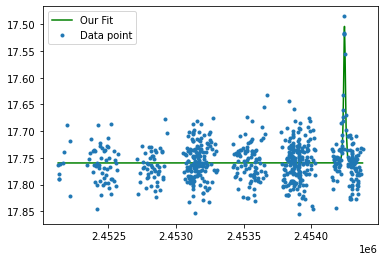

In [11]:
popt, pcov = curve_fit(pspl, phot_df[0], phot_df[1], p0=[phot_df[0][phot_df[1].idxmin()],1,1,1])
plt.plot(phot_df[0], pspl(phot_df[0], *popt), 'g-', label="Our Fit")
plt.plot(phot_df[0], phot_df[1], ".", label="Data point")
#plt.plot(phot_df[0], pspl(phot_df[0], t0 = param_df[1][0], tE = param_df[1][1], u0 = param_df[1][2], Fs = param_df[1][6]), 'r--', label="OGLE fit")
plt.gca().invert_yaxis()
plt.legend() 

In [12]:
tmp1 =  phot_df[phot_df[0] > phot_df[0][phot_df[1].idxmin()]-param_df[1][1]-10]
_ = tmp1[tmp1[0] < phot_df[0][phot_df[1].idxmin()]+param_df[1][1]+10]
new = pd.DataFrame()
new['time'] = _[0]
new['mag'] = _[1]
new['error']=_[2]
new.reset_index(drop=True, inplace=True)

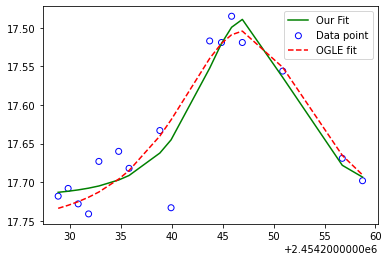

[2.45424709e+06 4.87184162e+00 1.18130391e+00 1.77201980e+01]


In [13]:
popt, pcov = curve_fit(pspl, new['time'], new['mag'], p0=[new['time'][new['mag'].idxmin()],1,1,1])
plt.plot(new['time'], pspl(new['time'], *popt), 'g', label="Our Fit")
plt.scatter(new['time'], new['mag'], label="Data point", facecolors='none', edgecolors='b')
plt.plot(new['time'], pspl(new['time'], t0 = param_df[1][0], tE = param_df[1][1], u0 = param_df[1][2], Fs = param_df[1][6]), 'r--', label="OGLE fit")
plt.legend()
plt.gca().invert_yaxis()
plt.show()
print(popt)


Start fit on Sagittarius A*, with model PSPL and method LM
check_event  : Everything looks fine, this event can be fitted
initial_guess  : Initial parameters guess SUCCESS
lmarquardt  : Levenberg_marquardt fit SUCCESS
[2455759.653637251, 0.21071097116038393, 40.41268845595557, 18212.400729812256, -0.38743402333829946, 878152.8793815977]


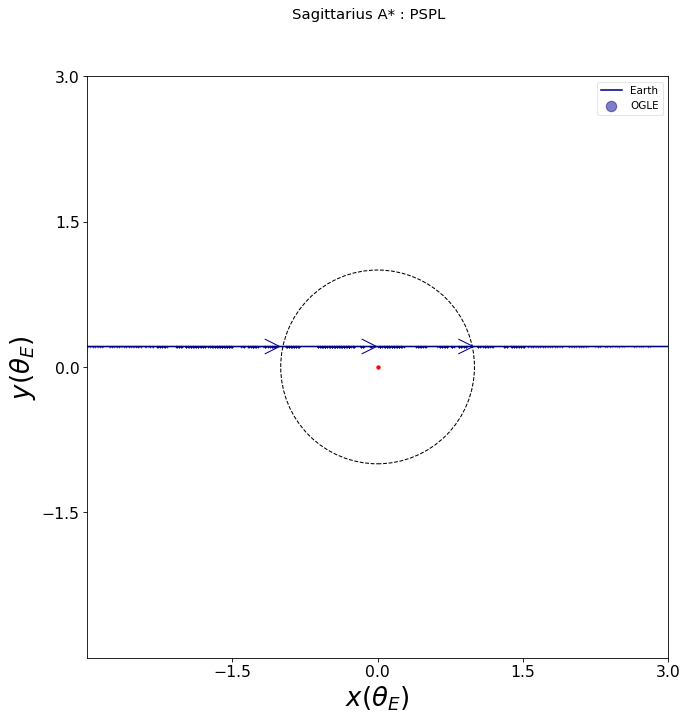

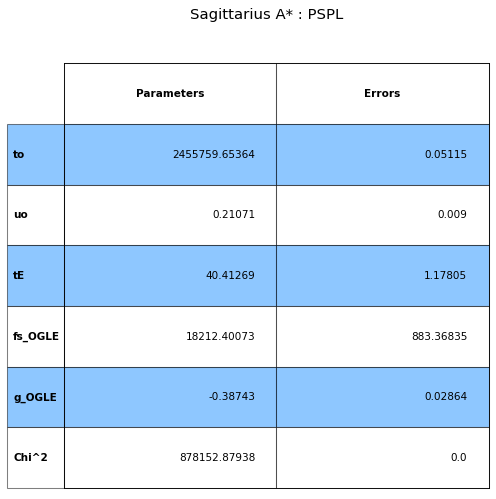

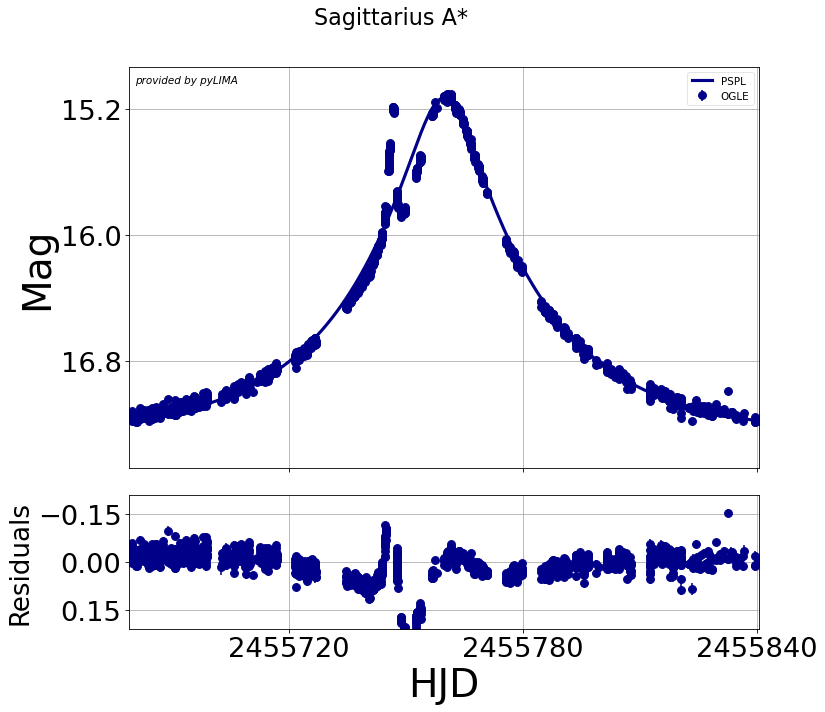

In [93]:
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA import microlmodels

### Create an event object.
your_event = event.Event()

### Create a telescopes objects.
data_1 = np.loadtxt(phots[11])

telescope_1 = telescopes.Telescope(
name='OGLE',
camera_filter='I',
light_curve_magnitude=data_1)

### Add the telescopes to your event.

your_event.telescopes.append(telescope_1)

### Construct the model.
model_1 = microlmodels.create_model('PSPL', your_event)

### Fit using Levenberg-Marquardt algorithm.
your_event.fit(model_1,'LM')
### Producing outputs.
your_event.fits[0].produce_outputs()